In [4]:
import pandas as pd
import numpy as np
import intake

In [5]:
cat = intake.open_catalog('../catalogs/catalog.yml')
measures = cat.measures.read().set_index('cdtfa_id')

In [6]:
measures

,ballot_designation,county_fips,county_name,lost_rate,total_pct_transit,pct_transit_ops,pct_transit_capital,pct_local_return,pct_hwy,pct_streets,pct_discretionary,year,amendable,change_feq,two_thirds_req
cdtfa_id,,,,,,,,,,,,,,,
377,Measure BB,6001,Alameda,0.01000,0.4800,0.2381,0.1400,NaN,0.3000,0.0900,NaN,2014.0,True,NaN,True
24,Measure J,6013,Contra Costa,0.00500,0.3270,0.1880,0.1390,NaN,0.2550,26.4000,6.900,2004.0,True,NaN,True
12,Measure C Extension,6019,Fresno,0.00500,0.3200,NaN,0.0600,0.3460,0.2940,NaN,NaN,2007.0,True,NaN,NaN
29,Measure D,6025,Imperial,0.00500,0.0200,NaN,NaN,NaN,0.0500,0.9300,NaN,2008.0,True,NaN,True
5,Proposition A,6037,Los Angeles,0.00500,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,1980.0,NaN,NaN,NaN
35,Proposition C,6037,Los Angeles,0.00500,0.5500,NaN,NaN,0.2000,0.2500,NaN,NaN,1990.0,NaN,NaN,NaN
217,Measure R,6037,Los Angeles,0.00500,0.6500,0.2500,0.4000,0.1500,0.2000,NaN,NaN,2008.0,True,10.0,NaN
576,Measure M,6037,Los Angeles,0.00500,0.6500,0.2700,0.3800,0.1600,0.1700,0.0200,NaN,2016.0,True,NaN,NaN
144,T,6039,Madera,0.00500,0.0200,NaN,NaN,0.2175,NaN,0.2175,0.510,2006.0,NaN,NaN,NaN


### Amount of transit funding varies greatly between LOST measures

In [7]:
measures['total_pct_transit'].mean()

0.33239

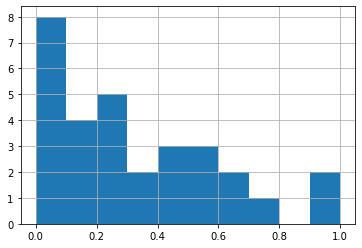

In [8]:
measures['total_pct_transit'].hist();

### LOST measures seem to fund transit operations more than capital, but data incomplete

In [9]:
measures['pct_transit_ops'].mean()

0.24908125

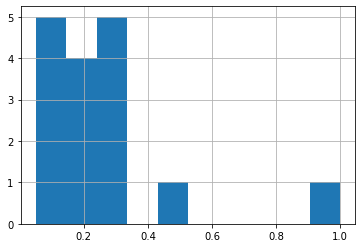

In [10]:
measures['pct_transit_ops'].hist();

In [11]:
measures['pct_transit_capital'].mean()

0.15301818181818183

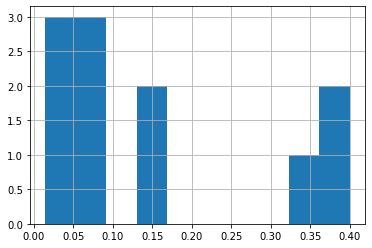

In [12]:
measures['pct_transit_capital'].hist();

<AxesSubplot:>

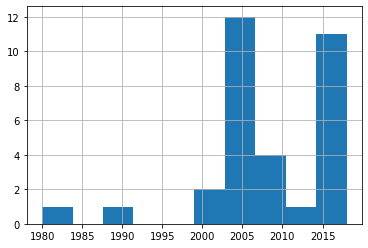

In [13]:
measures['year'].hist()

### Quick funding example using CDTFA data

In [14]:
cdtfa = cat.cdtfa.read().set_index('Jurisdiction Id')

In [20]:
measures_joined = (cdtfa[cdtfa['Calendar Year'] == 2019]
                   .join(measures, how='inner')
                  )

In [21]:
measures_joined

,Calendar Year,Quarter,Acronym,Jurisdiction,Gross,Prior Advance,Administrative Cost,Net Amount,ballot_designation,county_fips,...,pct_transit_ops,pct_transit_capital,pct_local_return,pct_hwy,pct_streets,pct_discretionary,year,amendable,change_feq,two_thirds_req
3,2019,4,SCCT,Santa Clara County Transit Distric,6.365805e+07,3.865187e+07,649090.0,24357091.61,A,6085,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN
3,2019,3,SCCT,Santa Clara County Transit Distric,5.759379e+07,4.064705e+07,649090.0,16297643.78,A,6085,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN
3,2019,2,SCCT,Santa Clara County Transit Distric,5.828508e+07,3.897843e+07,649090.0,18657565.78,A,6085,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN
3,2019,1,SCCT,Santa Clara County Transit Distric,5.387868e+07,3.630139e+07,587330.0,16989963.99,A,6085,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN
5,2019,4,LACT,Los Angeles County Transportation,2.418076e+08,1.394375e+08,2436070.0,99934008.64,Proposition A,6037,...,NaN,NaN,NaN,NaN,NaN,NaN,1980.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,2019,2,SBCS,San Benito County Safety Transacti,2.184095e+06,1.008745e+06,10660.0,1164690.14,Measure G,6067,...,NaN,NaN,NaN,0.500,0.450,NaN,2018.0,True,1.0,NaN
706,2019,1,SBCS,San Benito County Safety Transacti,1.979772e+04,NaN,NaN,19797.72,Measure G,6067,...,NaN,NaN,NaN,0.500,0.450,NaN,2018.0,True,1.0,NaN
742,2019,4,SMTD,San Mateo County 2018 Transit Dist,2.707584e+07,1.435221e+07,273920.0,12449708.89,W,6081,...,NaN,NaN,0.1,0.225,0.175,0.1,2018.0,True,NaN,NaN
742,2019,3,SMTD,San Mateo County 2018 Transit Dist,2.353181e+07,1.352565e+07,273920.0,9732238.04,W,6081,...,NaN,NaN,0.1,0.225,0.175,0.1,2018.0,True,NaN,NaN


In [25]:
measures_joined.to_parquet('../data/interim/measures_cdtfa_joined.parquet')

In [22]:
santa_cruz = measures_joined.loc[547]
santa_cruz

,Calendar Year,Quarter,Acronym,Jurisdiction,Gross,Prior Advance,Administrative Cost,Net Amount,ballot_designation,county_fips,...,pct_transit_ops,pct_transit_capital,pct_local_return,pct_hwy,pct_streets,pct_discretionary,year,amendable,change_feq,two_thirds_req
547,2019,4,SCZT,Santa Cruz County Transportation T,6132031.39,3706693.38,62760.0,2362578.01,Measure D,6087,...,0.2,0.08,0.3,0.25,0.17,NaN,2016.0,True,NaN,True
547,2019,3,SCZT,Santa Cruz County Transportation T,5907643.84,4294060.12,62760.0,1550823.72,Measure D,6087,...,0.2,0.08,0.3,0.25,0.17,NaN,2016.0,True,NaN,True
547,2019,2,SCZT,Santa Cruz County Transportation T,5438146.34,4037086.75,62760.0,1338299.59,Measure D,6087,...,0.2,0.08,0.3,0.25,0.17,NaN,2016.0,True,NaN,True
547,2019,1,SCZT,Santa Cruz County Transportation T,5111143.49,3695605.27,73540.0,1341998.22,Measure D,6087,...,0.2,0.08,0.3,0.25,0.17,NaN,2016.0,True,NaN,True


In [23]:
santa_cruz['Transit Operations Funding'] = santa_cruz['Net Amount'] * santa_cruz['pct_transit_ops']

<ipython-input-23-ac1c81f361b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  santa_cruz['Transit Operations Funding'] = santa_cruz['Net Amount'] * santa_cruz['pct_transit_ops']


### Estimate of 2019 Quarterly Transit Operations funding from Santa Cruz's Measure D

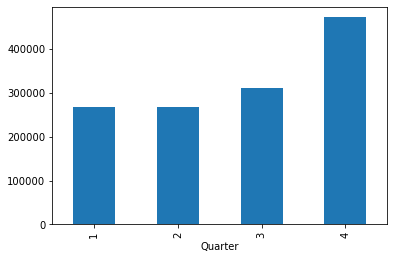

In [24]:
santa_cruz.set_index('Quarter')['Transit Operations Funding'].plot(kind='bar');